# **Task 3**

## **DJS Synapse Learning Period**
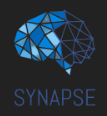

In the task for this week, we will be exploring another machine learning model called the decision tree classifier. We will also learn hyperparameter tuning using ensemble methods(Bagging & Boosting) and Decision Tree Pruning. 

# Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [111]:
#write code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
train_df=pd.read_csv("/content/drive/MyDrive/synapse_w3/titanic_data.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [114]:
import re


In [115]:
def titanic_preprocessing_pipeline(train_df):
  
  title_list = []
  for i in train_df["Name"]:
    title_search = re.search('(\w+)\.', i)
    if title_search:
      title = title_search.group(1)
      title_list.append(title)
  train_df["Title"] = title_list
  
  train_df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
  nan_dict = {}
  for i in train_df.columns:
    nan_dict[i] = (train_df[i].isnull().sum()/len(train_df))*100
  
  for i,j in nan_dict.items():
    if j>50:
      train_df.drop([i],axis=1,inplace=True)
  
  train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
  train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
  train_df["Family_members"] = train_df["SibSp"] + train_df["Parch"]
  train_df.drop(["SibSp", "Parch"], axis=1, inplace=True)

  train_df['Age'] = normalize(train_df['Age'])
  train_df['Fare'] = normalize(train_df['Fare'])
  train_df['Family_members'] = normalize(train_df['Family_members'])
  
  train_df = pd.get_dummies(train_df, columns=["Pclass", "Sex", "Title", "Embarked"])
  return train_df


def normalize(column):
  return (column-column.min()) / (column. max()-column.min())
 
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1 solution NB
  #return the dataframe
  
  #pass #remove this line after writing the code

In [116]:
df=titanic_preprocessing_pipeline(train_df)
df


,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0.058556,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,0.045771,0.3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0.058556,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [117]:
df.isna().sum()

Survived          0
Age               0
Fare              0
Family_members    0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Sex_female        0
Sex_male          0
Title_Capt        0
Title_Col         0
Title_Countess    0
Title_Don         0
Title_Dr          0
Title_Jonkheer    0
Title_Lady        0
Title_Major       0
Title_Master      0
Title_Miss        0
Title_Mlle        0
Title_Mme         0
Title_Mr          0
Title_Mrs         0
Title_Ms          0
Title_Rev         0
Title_Sir         0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
dtype: int64

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [118]:
#write code here
Y=df.Survived


<b>remove the y_label (survived) from the dataframe</b>

In [119]:
X=df.drop(["Survived"],axis=1,inplace=False)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [120]:
#write code here
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1,shuffle=False) 

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [121]:
#write code here
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(random_state=3)

<b>print the test accuracy and train accuracy here</b>

In [122]:
#write code here
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=3)

In [123]:
dt_model.score(X_train,Y_train)

0.985553772070626

In [124]:
dt_model.score(X_test,Y_test)

0.753731343283582

In [125]:
#train_accuracy=[]
#test_accuracy=[]
#for depth in range(1,20):
 # dt_model=DecisionTreeClassifier(max_depth=depth, random_state=3)
  #dt_model.fit(X_train,Y_train)
  #train_accuracy.append(dt_model.score(X_train,Y_train))
  #test_accuracy.append(dt_model.score(X_test,Y_test))



Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

In [126]:
#write code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()

#rf.fit(X_train,Y_train)

n_estimators = [int(x) for x in np.linspace(start=10, stop = 80, num= 10)]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True, False]

param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}

print(param_grid)

rf_grid= GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose =2, n_jobs=4)
rf_result=rf_grid.fit(X_train,Y_train)
print(rf_result)
print(rf_result.best_score_)

#OR



{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}
Fitting 3 folds for each of 320 candidates, totalling 960 fits
GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)
0.8265979189892233


In [127]:
rf_grid.best_params_



{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 17}

In [128]:
from sklearn.metrics import accuracy_score
rf_model=RandomForestClassifier(bootstrap=False,
 max_depth= 4,
 max_features='sqrt',
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators= 25)
rf_model.fit(X_train,Y_train)
pred=rf_model.predict(X_test)
print(accuracy_score(pred,Y_test))

0.835820895522388


### 2. Boosting

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
#write code here
grid={'n_estimators':[10,50,100,500],
      'learning_rate':[0.0001,0.001,0.01,0.1,1.0],
      'algorithm':['SAMME','SAMME.R']}

grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=1,cv=10,scoring='accuracy')

grid_result = grid_search.fit(X_train,Y_train)
grid_result.best_score_

0.8219662058371735

In [130]:
#OR

grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}

In [131]:
grid_model=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 1.0, n_estimators= 500)
grid_model.fit(X_train,Y_train)
pred=grid_model.predict(X_test)
print(accuracy_score(pred,Y_test))

0.8246268656716418


### 3. Pruning Techniques

In [132]:
#write code here
path = dt_model.cost_complexity_pruning_path(X_train, Y_train)
print(path)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)


{'ccp_alphas': array([0.00000000e+00, 4.45871232e-05, 3.21027287e-04, 3.65614411e-04,
       4.45871232e-04, 5.35045479e-04, 5.35045479e-04, 7.13393972e-04,
       9.63081862e-04, 9.63081862e-04, 9.69769930e-04, 9.72809962e-04,
       9.80916711e-04, 1.01377038e-03, 1.03557189e-03, 1.04577071e-03,
       1.07009096e-03, 1.07009096e-03, 1.09278986e-03, 1.11467808e-03,
       1.22296109e-03, 1.23222595e-03, 1.35544855e-03, 1.37583123e-03,
       1.43003064e-03, 1.44462279e-03, 1.44462279e-03, 1.50785544e-03,
       1.52487961e-03, 1.52870137e-03, 1.58220592e-03, 1.60513644e-03,
       1.67094417e-03, 1.78093709e-03, 1.81092316e-03, 1.87614677e-03,
       1.95480765e-03, 2.05902924e-03, 2.13430229e-03, 2.14018192e-03,
       2.23746291e-03, 2.29033302e-03, 2.36392821e-03, 2.40770465e-03,
       2.56380950e-03, 2.60834671e-03, 2.75930597e-03, 2.85357589e-03,
       2.96332881e-03, 3.05246782e-03, 3.22281845e-03, 4.57086444e-03,
       5.35876295e-03, 5.61305325e-03, 6.81399457e-03, 1.05333

In [133]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)



In [134]:
train_acc=[]
test_acc=[]
for c in clfs:
  y_train_pred=c.predict(X_train)
  y_test_pred=c.predict(X_test)
  train_acc.append(accuracy_score(y_train_pred,Y_train))
  test_acc.append(accuracy_score(y_test_pred,Y_test))

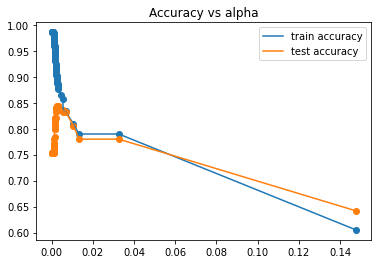

In [135]:
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train accuracy')
plt.plot(ccp_alphas,test_acc,label='test accuracy')
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [136]:

clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.01)
clf.fit(X_train,Y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print(f'train accuracy {accuracy_score(y_train_pred,Y_train)}')
print(f'test accuracy {accuracy_score(Y_test,y_test_pred)}')

train accuracy 0.8330658105939005
test accuracy 0.832089552238806


## Optimal model

After studying these techniques, analyse which method gives you the best accuracy and choose it as your final model.


Bagging accuracy:0.832089552238806           at max depht=4      
Boosting accuracy:0.8246268656716418       at learning rate=1.0       
Pruning accuracy: 0.832089552238806     at alpha =0.01       

bagging and pruning give same highest accuracy


<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Naive Bayes Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2022 - 2023